# Springboard Regression Case Study - The Red Wine Dataset - Tier 3

Welcome to the Springboard Regression case study! Please note: this is ***Tier 3*** of the case study.

This case study was designed for you to **use Python to apply the knowledge you've acquired in reading *The Art of Statistics* (hereinafter *AoS*) by Professor Spiegelhalter**. Specifically, the case study will get you doing regression analysis; a method discussed in Chapter 5 on p.121. It might be useful to have the book open at that page when doing the case study to remind you of what it is we're up to (but bear in mind that other statistical concepts, such as training and testing, will be applied, so you might have to glance at other chapters too).  

The aim is to ***use exploratory data analysis (EDA) and regression to predict alcohol levels in wine with a model that's as accurate as possible***. 

We'll try a *univariate* analysis (one involving a single explanatory variable) as well as a *multivariate* one (involving multiple explanatory variables), and we'll iterate together towards a decent model by the end of the notebook. The main thing is for you to see how regression analysis looks in Python and jupyter, and to get some practice implementing this analysis.

Throughout this case study, **questions** will be asked in the markdown cells. Try to **answer these yourself in a simple text file** when they come up. Most of the time, the answers will become clear as you progress through the notebook. Some of the answers may require a little research with Google and other basic resources available to every data scientist. 

For this notebook, we're going to use the red wine dataset, wineQualityReds.csv. Make sure it's downloaded and sitting in your working directory. This is a very common dataset for practicing regression analysis and is actually freely available on Kaggle, [here](https://www.kaggle.com/piyushgoyal443/red-wine-dataset).

You're pretty familiar with the data science pipeline at this point. This project will have the following structure: 
**1. Sourcing and loading** 
- Import relevant libraries
- Load the data 
- Exploring the data
- Choosing a dependent variable
 
**2. Cleaning, transforming, and visualizing**
- Visualizing correlations
  
  
**3. Modeling** 
- Train/Test split
- Making a Linear regression model: your first model
- Making a Linear regression model: your second model: Ordinary Least Squares (OLS) 
- Making a Linear regression model: your third model: multiple linear regression
- Making a Linear regression model: your fourth model: avoiding redundancy

**4. Evaluating and concluding** 
- Reflection 
- Which model was best?
- Other regression algorithms

### 1. Sourcing and loading

#### 1a. Import relevant libraries 

In [178]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here. This package is for Cross-sectional models and methods. 
                                                                            #The API focuses on models and the most frequently used statistical test, and tools. 
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here. The function imported plots a line given an intercept and slope.

from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
                                                            # The mean_squared_error (MSE) function allows us to calculate the Mean squared error regression loss. 
                                                            # The r2_score function allows us to calculate the regression score (Coefficient of determination).

from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
                                                            # Split arrays or matrices into random train and test subsets.

from sklearn import linear_model, preprocessing # What does this do? Find out and type here. Both are sklearn packages
                                                            # linear_model allows us to use different functions for performing machine learning with linear models. 
                                        # preprocessing package provide provides several common utility functions and 
                                        #transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#### 1b. Load the data

In [179]:
# Load the data. 
path = './Data/wineQualityReds.csv'
redwine = pd.read_csv(path, header=0,index_col=0)

#### 1c. Exploring the data

In [180]:
# Check out its appearance. 
redwine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.88         0.00             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968  3.20       0.68   
3                 15.0                  54.0   0.9970  3.26       0.65   
4                 17.0                  60.0   0.9980  3.16       0.58   
5                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
1      9.4        5  
2      9.8        5  
3      9.8        5  
4      9.8        6  
5      9.4        5

In [181]:
redwine.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [182]:
# Another very useful method to call on a recently imported dataset is .info(). Call it here to get a good
# overview of the data
redwine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


[[<Axes: xlabel='fixed.acidity', ylabel='fixed.acidity'>
  <Axes: xlabel='volatile.acidity', ylabel='fixed.acidity'>
  <Axes: xlabel='citric.acid', ylabel='fixed.acidity'>
  <Axes: xlabel='residual.sugar', ylabel='fixed.acidity'>
  <Axes: xlabel='chlorides', ylabel='fixed.acidity'>
  <Axes: xlabel='free.sulfur.dioxide', ylabel='fixed.acidity'>
  <Axes: xlabel='total.sulfur.dioxide', ylabel='fixed.acidity'>
  <Axes: xlabel='density', ylabel='fixed.acidity'>
  <Axes: xlabel='pH', ylabel='fixed.acidity'>
  <Axes: xlabel='sulphates', ylabel='fixed.acidity'>
  <Axes: xlabel='alcohol', ylabel='fixed.acidity'>
  <Axes: xlabel='quality', ylabel='fixed.acidity'>]
 [<Axes: xlabel='fixed.acidity', ylabel='volatile.acidity'>
  <Axes: xlabel='volatile.acidity', ylabel='volatile.acidity'>
  <Axes: xlabel='citric.acid', ylabel='volatile.acidity'>
  <Axes: xlabel='residual.sugar', ylabel='volatile.acidity'>
  <Axes: xlabel='chlorides', ylabel='volatile.acidity'>
  <Axes: xlabel='free.sulfur.dioxide', 

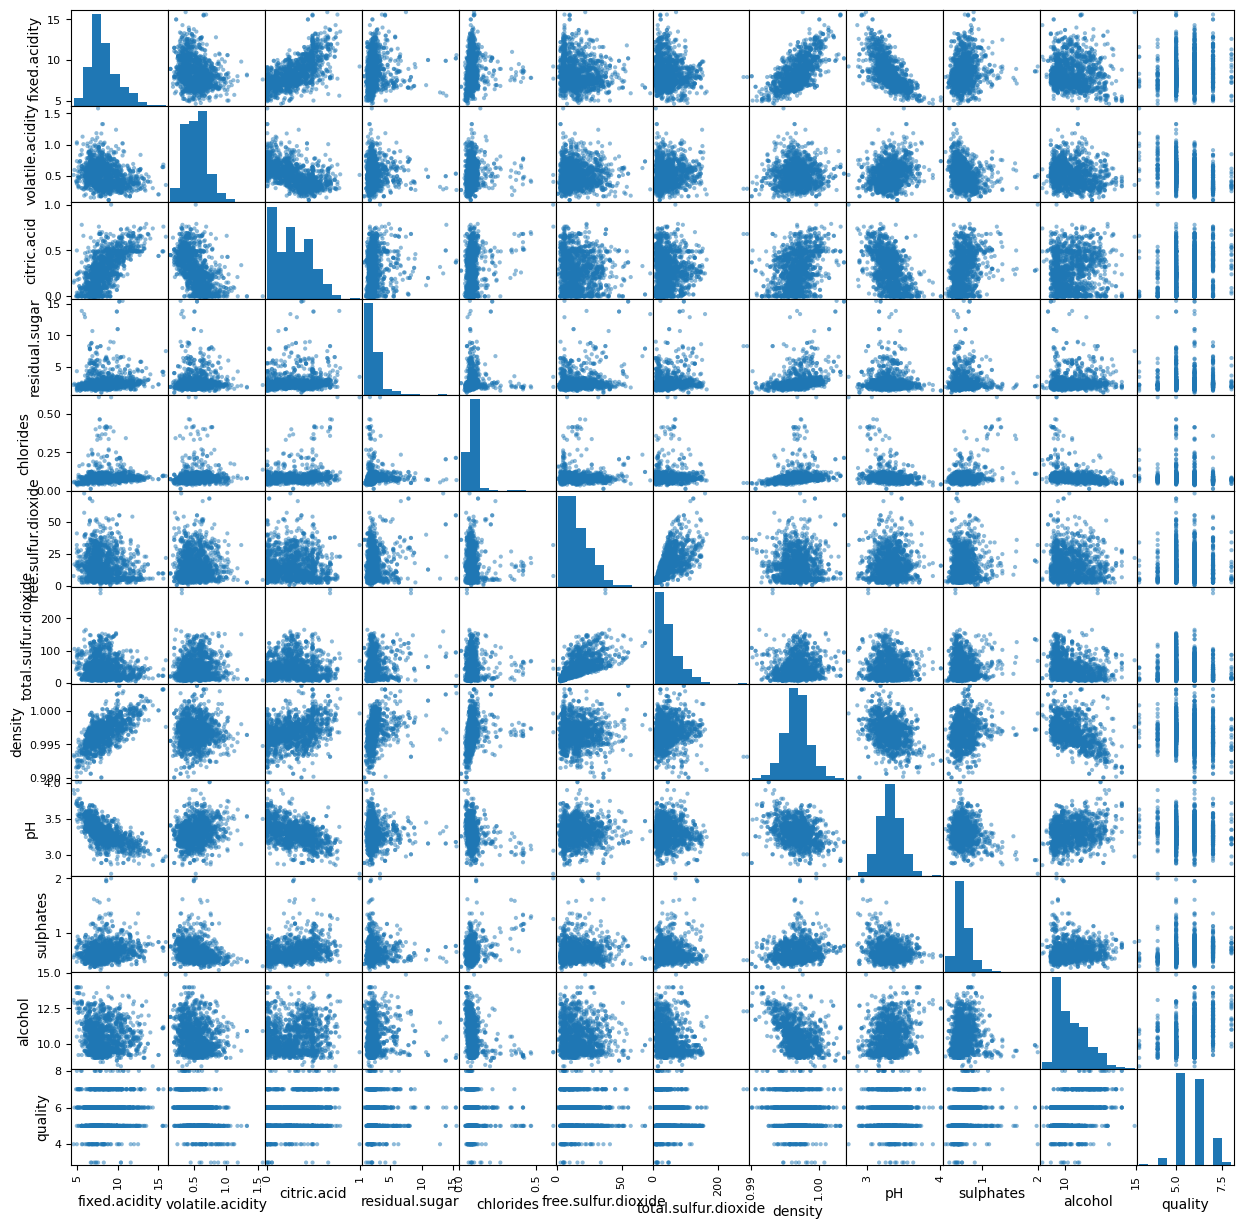

In [183]:
print(pd.plotting.scatter_matrix(redwine,figsize=(15,15)))

What can you infer about the nature of these variables, as output by the info() method?
    
    1) A particular characteristic of this dataset is that all variables are float or integers. 
    2) Also, we can notice that there are not NaN values in the dataset. 

Which variables might be suitable for regression analysis, and why? For those variables that aren't suitable for regression analysis, is there another type of statistical modeling for which they are suitable?
    
    1) Most of the variables are sutiable for a regression analysis, except for quality, which may be considered a categorical value, 
    2) For the quality variable, another statistical modeling that may be useful is the classification technique.



In [184]:
# We should also look more closely at the dimensions of the dataset. 
redwine.shape

(1599, 12)

#### 1d. Choosing a dependent variable

We now need to pick a dependent variable for our regression analysis: a variable whose values we will predict. 

'Quality' seems to be as good a candidate as any. Let's check it out. One of the quickest and most informative ways to understand a variable is to make a histogram of it. This gives us an idea of both the center and spread of its values. 

<Axes: >

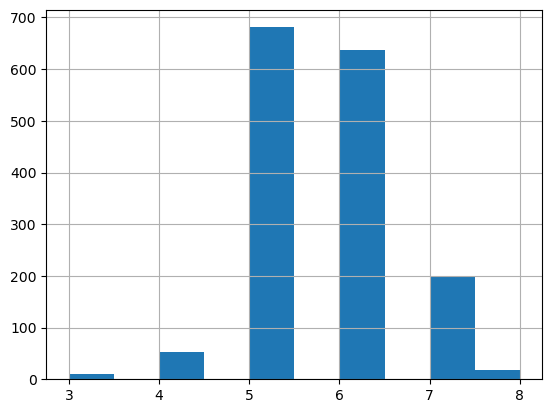

In [185]:
# Making a histogram of the quality variable.
redwine.quality.hist()


We can see so much about the quality variable just from this simple visualization. Answer yourself: what value do most wines have for quality? What is the minimum quality value below, and the maximum quality value? What is the range? Remind yourself of these summary statistical concepts by looking at p.49 of the *AoS*.

But can you think of a problem with making this variable the dependent variable of regression analysis? Remember the example in *AoS* on p.122 of predicting the heights of children from the heights of parents? Take a moment here to think about potential problems before reading on. 

The issue is this: quality is a *discrete* variable, in that its values are integers (whole numbers) rather than floating point numbers. Thus, quality is not a *continuous* variable. But this means that it's actually not the best target for regression analysis. 

Before we dismiss the quality variable, however, let's verify that it is indeed a discrete variable with some further exploration. 

In [186]:
# Get a basic statistical summary of the variable 
redwine.quality.describe()

# What do you notice from this summary? 
#    1) It seems to be that the range is from 3 to 8

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [187]:
# Get a list of the values of the quality variable, and the number of occurrences of each. 
redwine.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

The outputs of the describe() and value_counts() methods are consistent with our histogram, and since there are just as many values as there are rows in the dataset, we can infer that there are no NAs for the quality variable. 

But scroll up again to when we called info() on our wine dataset. We could have seen there, already, that the quality variable had int64 as its type. As a result, we had sufficient information, already, to know that the quality variable was not appropriate for regression analysis. Did you figure this out yourself? If so, kudos to you!

The quality variable would, however, conduce to proper classification analysis. This is because, while the values for the quality variable are numeric, those numeric discrete values represent *categories*; and the prediction of category-placement is most often best done by classification algorithms. You saw the decision tree output by running a classification algorithm on the Titanic dataset on p.168 of Chapter 6 of *AoS*. For now, we'll continue with our regression analysis, and continue our search for a suitable dependent variable. 

Now, since the rest of the variables of our wine dataset are continuous, we could — in theory — pick any of them. But that does not mean that are all equally sutiable choices. What counts as a suitable dependent variable for regression analysis is determined not just by *intrinsic* features of the dataset (such as data types, number of NAs etc) but by *extrinsic* features, such as, simply, which variables are the most interesting or useful to predict, given our aims and values in the context we're in. Almost always, we can only determine which variables are sensible choices for dependent variables with some **domain knowledge**. 

Not all of you might be wine buffs, but one very important and interesting quality in wine is [acidity](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity). As the Waterhouse Lab at the University of California explains, 'acids impart the sourness or tartness that is a fundamental feature in wine taste.  Wines lacking in acid are "flat." Chemically the acids influence titrable acidity which affects taste and pH which affects  color, stability to oxidation, and consequantly the overall lifespan of a wine.'

If we cannot predict quality, then it seems like **fixed acidity** might be a great option for a dependent variable. Let's go for that.

So if we're going for fixed acidity as our dependent variable, what we now want to get is an idea of *which variables are related interestingly to that dependent variable*. 

We can call the .corr() method on our wine data to look at all the correlations between our variables. As the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) shows, the default correlation coefficient is the Pearson correlation coefficient (p.58 and p.396 of the *AoS*); but other coefficients can be plugged in as parameters. Remember, the Pearson correlation coefficient shows us how close to a straight line the data-points fall, and is a number between -1 and 1. 

In [188]:
# Call the .corr() method on the wine dataset 
round(redwine.corr(),2)

fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity                  1.00             -0.26         0.67   
volatile.acidity              -0.26              1.00        -0.55   
citric.acid                    0.67             -0.55         1.00   
residual.sugar                 0.11              0.00         0.14   
chlorides                      0.09              0.06         0.20   
free.sulfur.dioxide           -0.15             -0.01        -0.06   
total.sulfur.dioxide          -0.11              0.08         0.04   
density                        0.67              0.02         0.36   
pH                            -0.68              0.23        -0.54   
sulphates                      0.18             -0.26         0.31   
alcohol                       -0.06             -0.20         0.11   
quality                        0.12             -0.39         0.23   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity                   0.11       0.09                -0.15   
volatile.acidity                0.00       0.06                -0.01   
citric.acid                     0.14       0.20                -0.06   
residual.sugar                  1.00       0.06                 0.19   
chlorides                       0.06       1.00                 0.01   
free.sulfur.dioxide             0.19       0.01                 1.00   
total.sulfur.dioxide            0.20       0.05                 0.67   
density                         0.36       0.20                -0.02   
pH                             -0.09      -0.27                 0.07   
sulphates                       0.01       0.37                 0.05   
alcohol                         0.04      -0.22                -0.07   
quality                         0.01      -0.13                -0.05   

                      total.sulfur.dioxide  density    pH  sulphates  alcohol  \
fixed.acidity                        -0.11     0.67 -0.68       0.18    -0.06   
volatile.acidity                      0.08     0.02  0.23      -0.26    -0.20   
citric.acid                           0.04     0.36 -0.54       0.31     0.11   
residual.sugar                        0.20     0.36 -0.09       0.01     0.04   
chlorides                             0.05     0.20 -0.27       0.37    -0.22   
free.sulfur.dioxide                   0.67    -0.02  0.07       0.05    -0.07   
total.sulfur.dioxide                  1.00     0.07 -0.07       0.04    -0.21   
density                               0.07     1.00 -0.34       0.15    -0.50   
pH                                   -0.07    -0.34  1.00      -0.20     0.21   
sulphates                             0.04     0.15 -0.20       1.00     0.09   
alcohol                              -0.21    -0.50  0.21       0.09     1.00   
quality                              -0.19    -0.17 -0.06       0.25     0.48   

                      quality  
fixed.acidity            0.12  
volatile.acidity        -0.39  
citric.acid              0.23  
residual.sugar           0.01  
chlorides               -0.13  
free.sulfur.dioxide     -0.05  
total.sulfur.dioxide    -0.19  
density                 -0.17  
pH                      -0.06  
sulphates                0.25  
alcohol                  0.48  
quality                  1.00

Ok - you might be thinking, but wouldn't it be nice if we visualized these relationships? It's hard to get a picture of the correlations between the variables without anything visual. 

Very true, and this brings us to the next section.

### 2. Cleaning, Transforming, and Visualizing 

#### 2a. Visualizing correlations 
The heading of this stage of the data science pipeline ('Cleaning, Transforming, and Visualizing') doesn't imply that we have to do all of those operations in *that order*. Sometimes (and this is a case in point) our data is already relatively clean, and the priority is to do some visualization. Normally, however, our data is less sterile, and we have to do some cleaning and transforming first prior to visualizing. 

Now that we've chosen **fixed acidity** as our dependent variable for regression analysis, we can begin by plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

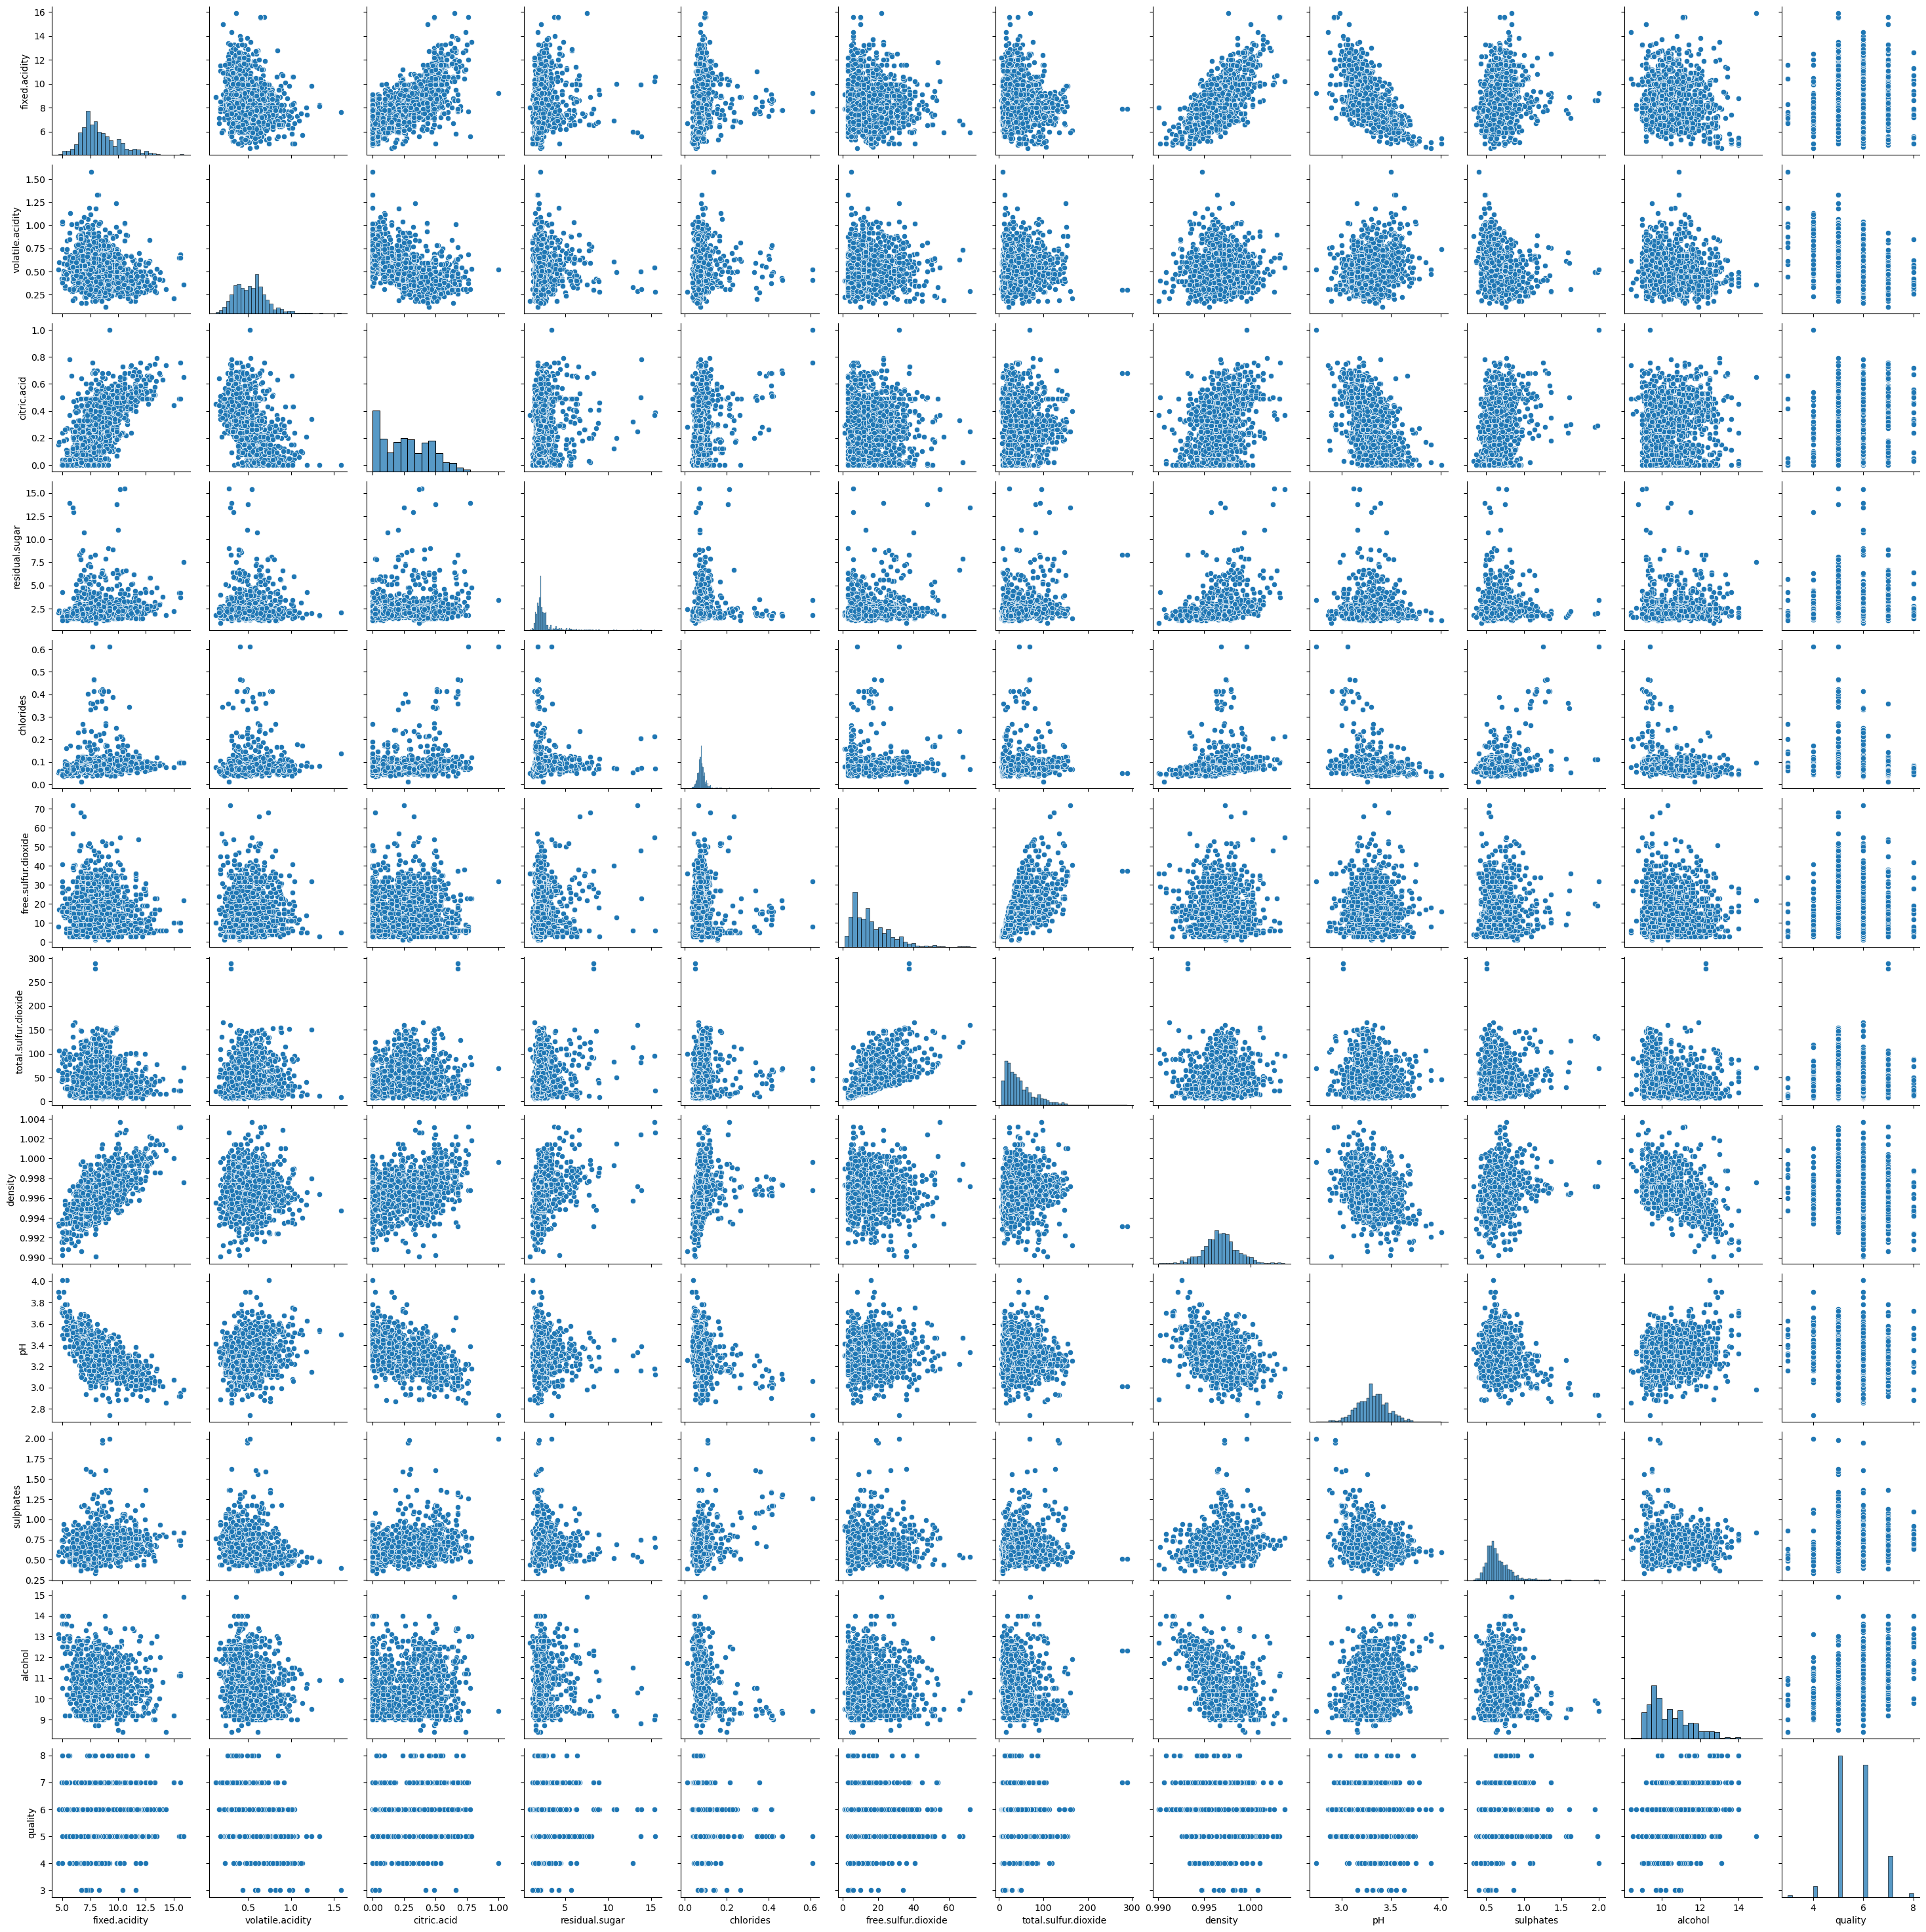

In [189]:
# Make a pairplot of the wine data
sns.pairplot(redwine)

If you've never executed your own Seaborn pairplot before, just take a moment to look at the output. They certainly output a lot of information at once. What can you infer from it? What can you *not* justifiably infer from it?

    1) I can infer some relationships between variables as for example (total sulfer dioxide vs fee.sulfur dioxide & free acidity vs citric acidity),
    2) Most importantly I can focus on the variables that are related to the potential dependent variable (**fixed acidity**) for example, free acidity vs density seems to be positive correlated, and free acidity vs ph seems to be negative correlated.


... All done? 

Here's a couple things you might have noticed: 
- a given cell value represents the correlation that exists between two variables 
- on the diagonal, you can see a bunch of histograms. This is because pairplotting the variables with themselves would be pointless, so the pairplot() method instead makes histograms to show the distributions of those variables' values. This allows us to quickly see the shape of each variable's values.  
- the plots for the quality variable form horizontal bands, due to the fact that it's a discrete variable. We were certainly right in not pursuing a regression analysis of this variable.
- Notice that some of the nice plots invite a line of best fit, such as alcohol vs density. Others, such as citric acid vs alcohol, are more inscrutable.

So we now have called the .corr() method, and the .pairplot() Seaborn method, on our wine data. Both have flaws. Happily, we can get the best of both worlds with a heatmap. 

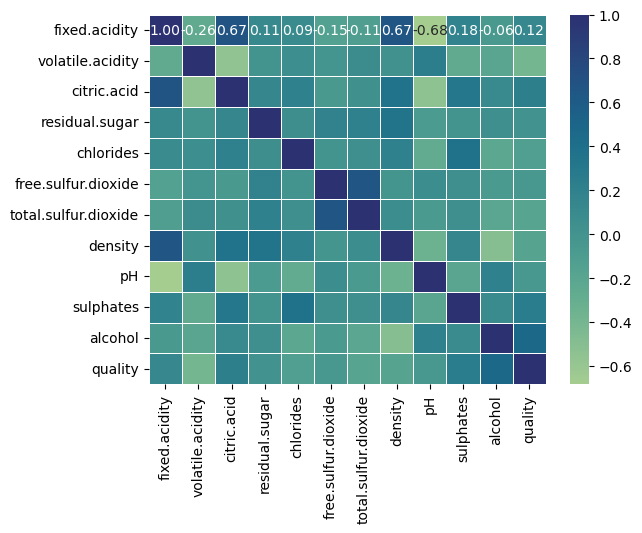

In [190]:
# Make a heatmap of the data 
data = redwine.corr()

ax = sns.heatmap(data, cmap='crest', annot=True, fmt='.2f', linewidth=0.7)

plt.show()

Take a moment to think about the following questions:
- How does color relate to extent of correlation?

 1) The stronger the color the stronger the correlation
    
- How might we use the plot to show us interesting relationships worth investigating?

 2) We can use the plot to quicly determine the variables that are more more correlated

- More precisely, what does the heatmap show us about the fixed acidity variable's relationship to the density variable?

 3) The heatmaps shows that the following variables are positive correlated to the fixed acidity: citric acid and density."

There is a relatively strong correlation between the density and fixed acidity variables respectively. In the next code block, call the scatterplot() method on our sns object. Make the x-axis parameter 'density', the y-axis parameter 'fixed.acidity', and the third parameter specify our wine dataset.  

<Axes: xlabel='density', ylabel='fixed.acidity'>

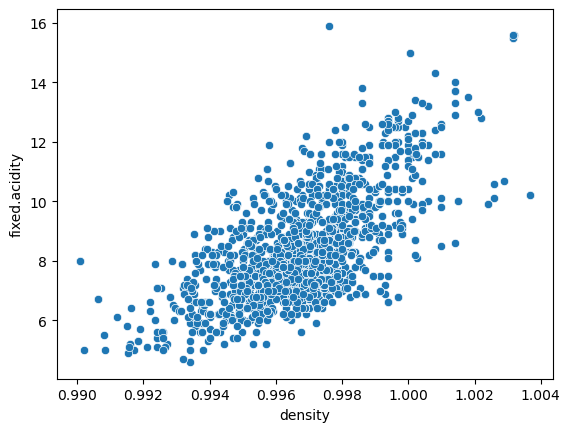

In [191]:
# Plot density against fixed.acidity
sns.scatterplot(x='density', y='fixed.acidity', data= redwine)

We can see a positive correlation, and quite a steep one. There are some outliers, but as a whole, there is a steep looking line that looks like it ought to be drawn. 

<Axes: xlabel='density', ylabel='fixed.acidity'>

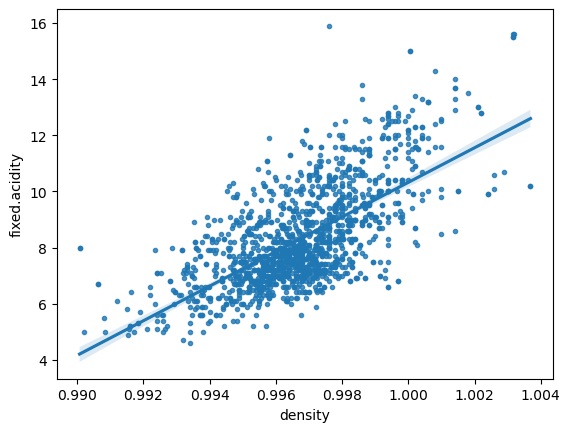

In [192]:
# Call the regplot method on your sns object, with parameters: x = 'density', y = 'fixed.acidity'
sns.regplot(x = 'density', y = 'fixed.acidity', data=redwine, marker='.')

The line of best fit matches the overall shape of the data, but it's clear that there are some points that deviate from the line, rather than all clustering close. 

Let's see if we can predict fixed acidity based on density using linear regression. 

### 3. Modeling 

#### 3a. Train/Test Split
While this dataset is super clean, and hence doesn't require much for analysis, we still need to split our dataset into a test set and a training set.

You'll recall from p.158 of *AoS* that such a split is important good practice when evaluating statistical models. On p.158, Professor Spiegelhalter was evaluating a classification tree, but the same applies when we're doing regression. Normally, we train with 75% of the data and test on the remaining 25%. 

To be sure, for our first model, we're only going to focus on two variables: fixed acidity as our dependent variable, and density as our sole independent predictor variable. 

We'll be using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) here. Don't worry if not all of the syntax makes sense; just follow the rationale for what we're doing. 

In [193]:
# Subsetting our data into our dependent and independent variables.
X = redwine[['density']]
y = redwine[['fixed.acidity']]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)



In [194]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(f'X_train shape: {X_train.shape}\n'
        f'X_test shape: {X_test.shape}\n'
        f'y_train shape: {y_train.shape}\n'
        f'y_test shape: {y_test.shape}')



X_train shape: (1199, 1)
X_test shape: (400, 1)
y_train shape: (1199, 1)
y_test shape: (400, 1)


#### 3b. Making a Linear Regression model: our first model
Sklearn has a [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function built into the linear_model module. We'll be using that to make our regression model. 

In [195]:
# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel = linear_model.LinearRegression()


In [196]:
# We now want to train the model on our test data.
rModel.fit(X_train, y_train)



LinearRegression()

In [197]:
# Evaluate the model  
y_pred = rModel.predict(X_test)


r2_score(y_test, y_pred)

0.49042335553888394

The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 45% of the variation from the mean. There's more work to do!

In [198]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)


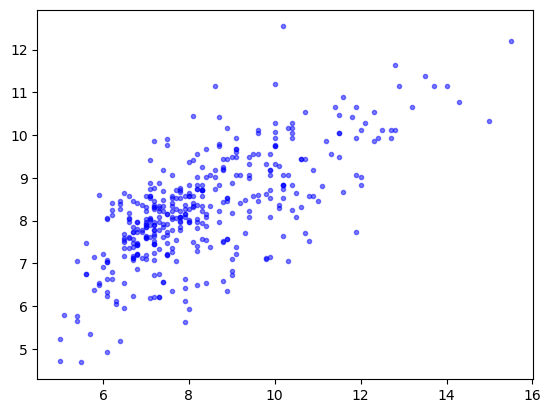

In [199]:
# Let's plot the predictions against the actual result. Use scatter()
ax = plt.scatter(x = y_test, y = y_pred, color='blue', marker='.', alpha=0.5)


The above scatterplot represents how well the predictions match the actual results. 

Along the x-axis, we have the actual fixed acidity, and along the y-axis we have the predicted value for the fixed acidity.

There is a visible positive correlation, as the model has not been totally unsuccesful, but it's clear that it is not maximally accurate: wines with an actual fixed acidity of just over 10 have been predicted as having acidity levels from about 6.3 to 13.

Let's build a similar model using a different package, to see if we get a better result that way.

#### 3c. Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [200]:
# Create the test and train sets. Here, we do things slightly differently.  
# We make the explanatory variable X as before.
X = redwine[['density']]

# But here, reassign X the value of adding a constant to it. This is required for Ordinary Least Squares Regression.
# Further explanation of this can be found here: 
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
X = sm.add_constant(X)

In [214]:
# The rest of the preparation is as before.
y = redwine[['fixed.acidity']]

# Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)


In [279]:
# Create the model
model = sm.OLS(y_train,X_train)

# Fit the model with fit() 
results = model.fit()


In [216]:
# Evaluate the model with .summary()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     901.3
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          4.41e-148
Time:                        19:47:55   Log-Likelihood:                -2010.6
No. Observations:                1199   AIC:                             4025.
Df Residuals:                    1197   BIC:                             4035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -599.6046     20.249    -29.611      0.000    -639.332    -559.877
density      609.8948     20.315     30.022      0.000     570.038     649.751
==============================================================================
Omnibus:                       86.460   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.105
Skew:                           0.649   Prob(JB):                     3.35e-24
Kurtosis:                       3.693   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

One of the great things about Statsmodels (sm) is that you get so much information from the summary() method. 

There are lots of values here, whose meanings you can explore at your leisure, but here's one of the most important: the R-squared score is 0.455, the same as what it was with the previous model. This makes perfect sense, right? It's the same value as the score from sklearn, because they've both used the same algorithm on the same data.

Here's a useful link you can check out if you have the time: https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [225]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = results.predict(X_test)

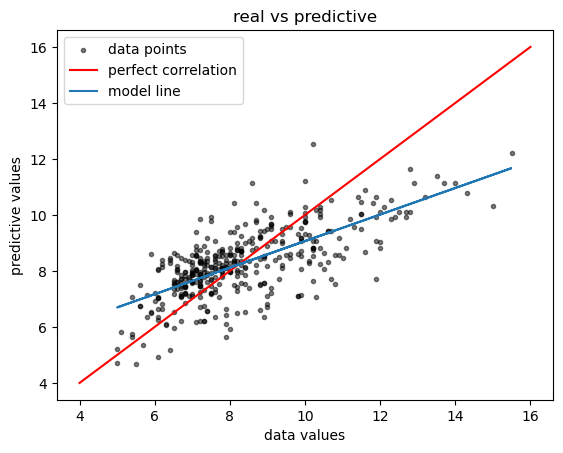

In [274]:
# Plot the predictions
# Build a scatterplot
ax = plt.scatter(x = y_test, y = y_pred, color='black', marker='.', alpha=0.5, label='data points')

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
ax = plt.plot([x for x in range(4,17)],[y for y in range(4,17)], color='r', label='perfect correlation')

x= y_test.iloc[:,0]
y= y_pred
slope, inter = np.polyfit(x,y,1)

plt.plot(y_test, (y_test*slope)+inter,label='model line')

# Label it nicely
plt.title('real vs predictive')
plt.xlabel('data values')
plt.ylabel('predictive values')
plt.legend()

The red line shows a theoretically perfect correlation between our actual and predicted values - the line that would exist if every prediction was completely correct. It's clear that while our points have a generally similar direction, they don't match the red line at all; we still have more work to do. 

To get a better predictive model, we should use more than one variable.

#### 3d. Making a Linear Regression model: our third model: multiple linear regression
Remember, as Professor Spiegelhalter explains on p.132 of *AoS*, including more than one explanatory variable into a linear regression analysis is known as ***multiple linear regression***. 

In [275]:
redwine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [318]:
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
X3 = redwine[['volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y3 = redwine[['fixed.acidity']]

# Create constants for X, so the model knows its bounds
X3 = sm.add_constant(X3)

# Split the data

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=42)

In [319]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
model3 = sm.OLS(y3_train, X3_train)

# Fit the model
results3 = model3.fit()


In [320]:
# Evaluate the model
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     743.2
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:45:38   Log-Likelihood:                -1159.0
No. Observations:                1199   AIC:                             2340.
Df Residuals:                    1188   BIC:                             2396.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -629.1062     15.333    -41.031      0.000    -659.188    -599.024
volatile.acidity         0.3153      0.137      2.297      0.022       0.046       0.585
citric.acid              1.9644      0.158     12.426      0.000       1.654       2.275
residual.sugar          -0.2656      0.015    -17.380      0.000      -0.296      -0.236
chlorides               -3.5584      0.448     -7.946      0.000      -4.437      -2.680
free.sulfur.dioxide      0.0102      0.003      4.081      0.000       0.005       0.015
total.sulfur.dioxide    -0.0067      0.001     -8.261      0.000      -0.008      -0.005
density                652.2003     15.289     42.658      0.000     622.204     682.197
pH                      -5.2860      0.151    -34.897      0.000      -5.583      -4.989
sulphates               -0.7486      0.125     -5.998      0.000      -0.993      -0.504
alcohol                  0.5536      0.025     21.980      0.000       0.504       0.603
==============================================================================
Omnibus:                      105.043   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.071
Skew:                           0.382   Prob(JB):                     1.45e-79
Kurtosis:                       5.585   Cond. No.                     7.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-Squared score shows a big improvement - our first model predicted only around 45% of the variation, but now we are predicting 87%!

In [321]:
# Use our new model to make predictions
y3_pred = results3.predict(X3_test)

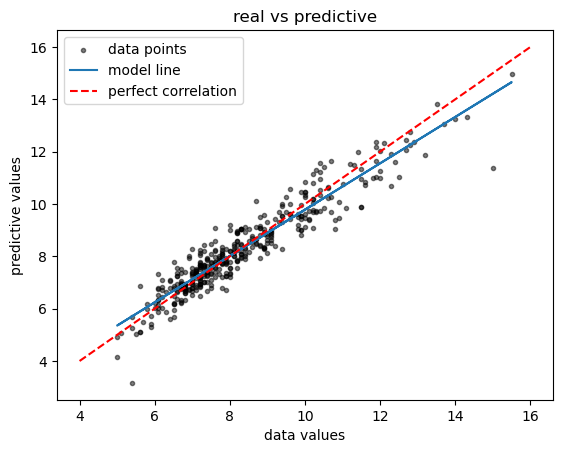

In [322]:
# Plot the predictions
# Build a scatterplot
ax = plt.scatter(x = y3_test, y = y3_pred, color='black', marker='.', alpha=0.5, label='data points')


x3= y_test.iloc[:,0]
y3= y3_pred
slope, inter = np.polyfit(x3,y3,1)
plt.plot(y3_test, (y3_test*slope)+inter,label='model line')


# Add a line for perfect correlation
ax = plt.plot([x for x in range(4,17)],[y for y in range(4,17)], color='r',linestyle='--', label='perfect correlation')

# Label it nicely
plt.title('real vs predictive')
plt.xlabel('data values')
plt.ylabel('predictive values')
plt.legend()

We've now got a much closer match between our data and our predictions, and we can see that the shape of the data points is much more similar to the red line. 

We can check another metric as well - the RMSE (Root Mean Squared Error). The MSE is defined by Professor Spiegelhalter on p.393 of *AoS*, and the RMSE is just the square root of that value. This is a measure of the accuracy of a regression model. Very simply put, it's formed by finding the average difference between predictions and actual values. Check out p. 163 of *AoS* for a reminder of how this works. 

In [323]:
# Define a function to check the RMSE. Remember the def keyword needed to make functions? 
def rmse(y_data, y_pred):
    mse = mean_squared_error(y_data, y_pred)
    return np.sqrt(mse)


In [324]:
# Get predictions from rModel3
y3_pred = results3.predict(X3_test)


# Put the predictions & actual values into a dataframe
actual_vs_pred_df = pd.DataFrame({'data_values':y3_test.iloc[:,0],'pred_values':y3_pred})
actual_vs_pred_df.reset_index(drop=True, inplace=True)
actual_vs_pred_df

data_values  pred_values
0            7.7     7.997368
1            7.8     6.775920
2           10.7    10.256835
3            8.5     9.028280
4            6.7     7.050710
..           ...          ...
395          6.7     6.777269
396         10.3     9.705993
397          7.1     7.267067
398          7.8     7.994744
399         10.6    10.229657

[400 rows x 2 columns]

In [325]:
rmse3 = rmse(actual_vs_pred_df['data_values'],actual_vs_pred_df['pred_values'])
rmse3

0.5913525125717076

The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 0.6 signifies that we are, on average, about 0.6 of a unit of fixed acidity away from the correct answer. That's not bad at all.

#### 3e. Making a Linear Regression model: our fourth model: avoiding redundancy 

We can also see from our early heat map that volatile.acidity and citric.acid are both correlated with pH. We can make a model that ignores those two variables and just uses pH, in an attempt to remove redundancy from our model.

In [326]:
# Create test and train datasets
# Include the remaining six columns as predictors
X4 = redwine[['residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates']]
y4 = redwine[['fixed.acidity']]


# Create constants for X, so the model knows its bounds
X4 = sm.add_constant(X4)

# Split the data

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=42)

In [327]:
# Create the fifth model
model4 = sm.OLS(y4_train, X4_train)
# Fit the model
results4 = model4.fit()
# Evaluate the model
results4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     461.3
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:45:52   Log-Likelihood:                -1561.0
No. Observations:                1199   AIC:                             3138.
Df Residuals:                    1191   BIC:                             3179.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -483.5586     16.131    -29.976      0.000    -515.208    -451.909
residual.sugar          -0.1194      0.020     -5.976      0.000      -0.159      -0.080
chlorides               -5.7885      0.579     -9.991      0.000      -6.925      -4.652
free.sulfur.dioxide      0.0061      0.003      1.771      0.077      -0.001       0.013
total.sulfur.dioxide    -0.0102      0.001     -9.600      0.000      -0.012      -0.008
density                514.7138     16.036     32.098      0.000     483.252     546.176
pH                      -6.1290      0.185    -33.217      0.000      -6.491      -5.767
sulphates                0.4836      0.161      3.009      0.003       0.168       0.799
==============================================================================
Omnibus:                       96.281   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.022
Skew:                           0.538   Prob(JB):                     4.92e-40
Kurtosis:                       4.570   Cond. No.                     5.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared score has reduced, showing us that actually, the removed columns were important.

### Conclusions & next steps

Congratulations on getting through this implementation of regression and good data science practice in Python! 

Take a moment to reflect on which model was the best, before reading on.

.
.
.

Here's one conclusion that seems right. While our most predictively powerful model was rModel3, this model had explanatory variables that were correlated with one another, which made some redundancy. Our most elegant and economical model was rModel4 - it used just a few predictors to get a good result. 

All of our models in this notebook have used the OLS algorithm - Ordinary Least Squares. There are many other regression algorithms, and if you have time, it would be good to investigate them. You can find some examples [here](https://www.statsmodels.org/dev/examples/index.html#regression). Be sure to make a note of what you find, and chat through it with your mentor at your next call.
